In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102115 entries, 0 to 102114
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   valak_presence_level   102115 non-null  object
 1   warren_sanctity_index  102115 non-null  object
 2   possession_state       102115 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [4]:
df.head(50)

,valak_presence_level,warren_sanctity_index,possession_state
0,166.5196394363827,828.5981971819135,Human
1,-559.7759097825524,-2802.879S48912762,Human
2,-700.7673002385288,-3507.8365011926444,Human
3,251.29164627128853,1252.4582313564426,Human
4,249.2559280878816,1242.2796404394078,Human
5,489.6206031655465,2444.10301S8277326,Human
6,84.6609988485684,419.304994242842,Human
7,"88,0066475ll04l59",446.033237555208,Possessed
8,"-572,0989364900383",-2864.494682450192,Human
9,-359.44090032860254,-1801.2045016430127,Human


In [5]:
df.isnull().sum()

valak_presence_level     0
warren_sanctity_index    0
possession_state         0
dtype: int64

In [6]:
import pandas as pd
import numpy as np
import re

# Load the dataset
try:
    df = pd.read_csv('train.csv')
    print("--- Original Data Info ---")
    df.info()
    print("\n--- Original Data Head ---")
    print(df.head())

    # --- Data Cleaning ---

    # 1. Clean numeric columns: 'valak_presence_level' and 'warren_sanctity_index'
    columns_to_clean = ['valak_presence_level', 'warren_sanctity_index']

    for col in columns_to_clean:
        # Convert to string and chain the specific replacements
        df[col] = df[col].astype(str) \
                        .str.replace(',', '.', regex=False) \
                        .str.replace('l', '1', regex=False) \
                        .str.replace('L', '1', regex=False) \
                        .str.replace('s', '5', regex=False) \
                        .str.replace('S', '5', regex=False)
    
        # ***FIXED***: This line is now INSIDE the loop.
        # After substitutions, remove any *remaining* non-numeric characters
        df[col] = df[col].str.replace(r'[^\d.-]', '', regex=True)
        
        # ***ADDED***: Convert the column to a numeric type.
        # errors='coerce' will turn any unparseable values (e.g., empty strings) into NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')


    # 2. Clean categorical column: 'possession_state'
    # Remove leading/trailing whitespace
    df['possession_state'] = df['possession_state'].str.strip()
    # Remove special characters like '_'
    df['possession_state'] = df['possession_state'].str.replace('_', '', regex=False)
    # Standardize casing (e.g., to Title Case)
    df['possession_state'] = df['possession_state'].str.title()

    # --- Post-Cleaning Inspection ---

    print("\n\n--- Cleaned Data Info ---")
    df.info()
    print("\n--- Cleaned Data Head ---")
    print(df.head())

    # Check for missing values introduced during cleaning
    print("\n--- Missing Values After Cleaning ---")
    print(df.isnull().sum())

    # --- Save Cleaned Data ---
    cleaned_file_name = 'cleaned_train.csv'
    df.to_csv(cleaned_file_name, index=False)
    print(f"\nCleaned data saved to '{cleaned_file_name}'")

except FileNotFoundError:
    print("Error: train.csv not found. Please make sure it's in the same directory.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Original Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102115 entries, 0 to 102114
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   valak_presence_level   102115 non-null  object
 1   warren_sanctity_index  102115 non-null  object
 2   possession_state       102115 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB

--- Original Data Head ---
  valak_presence_level warren_sanctity_index possession_state
0    166.5196394363827     828.5981971819135            Human
1   -559.7759097825524    -2802.879S48912762          Human  
2   -700.7673002385288   -3507.8365011926444            Human
3   251.29164627128853    1252.4582313564426            Human
4    249.2559280878816    1242.2796404394078            Human


--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102115 entries, 0 to 102114
Data columns (total 3 columns):
 #   Column              

In [8]:
df=pd.read_csv('cleaned_train.csv')
df.head(20)

,valak_presence_level,warren_sanctity_index,possession_state
0,166.519639,828.598197,Human
1,-559.775910,-2802.879549,Human
2,-700.767300,-3507.836501,Human
3,251.291646,1252.458231,Human
4,249.255928,1242.279640,Human
5,489.620603,2444.103016,Human
6,84.660999,419.304994,Human
7,88.006648,446.033238,Possessed
8,-572.098936,-2864.494682,Human
9,-359.440900,-1801.204502,Human


In [9]:
df['possession_state'].value_counts()

possession_state
Possessed    51056
Human        48466
Humán         2593
Name: count, dtype: int64

In [9]:
import pandas as pd

# Load the previously cleaned dataset
file_name = 'cleaned_train.csv'

try:
    df = pd.read_csv(file_name)

    print(f"Original value counts for 'possession_state' in {file_name}:")
    print(df['possession_state'].value_counts())

    # Standardize the 'possession_state' column
    # Replace 'Humán' with 'Human'
    df['possession_state'] = df['possession_state'].replace('Humán', 'Human')

    print("\nStandardized value counts for 'possession_state':")
    print(df['possession_state'].value_counts())

    # Save the standardized data to a new file
    standardized_file_name = 'standardized_train.csv'
    df.to_csv(standardized_file_name, index=False)

    print(f"\nStandardized data saved to '{standardized_file_name}'")

except FileNotFoundError:
    print(f"Error: The file {file_name} was not found. Please run the previous cleaning step first.")
except Exception as e:
    print(f"An error occurred: {e}")

Original value counts for 'possession_state' in cleaned_train.csv:
possession_state
Possessed    51056
Human        48466
Humán         2593
Name: count, dtype: int64

Standardized value counts for 'possession_state':
possession_state
Human        51059
Possessed    51056
Name: count, dtype: int64

Standardized data saved to 'standardized_train.csv'


In [10]:
df['possession_state'].value_counts()

possession_state
Human        51059
Possessed    51056
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102115 entries, 0 to 102114
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   valak_presence_level   102115 non-null  float64
 1   warren_sanctity_index  102115 non-null  float64
 2   possession_state       102115 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [12]:
df.isnull().sum()

valak_presence_level     0
warren_sanctity_index    0
possession_state         0
dtype: int64

In [13]:

x = df.drop(columns=['possession_state'])


In [14]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df['possession_state']=le.fit_transform(df['possession_state'])

In [15]:
df.head(20)

,valak_presence_level,warren_sanctity_index,possession_state
0,1.665196e+02,828.598197,0
1,-5.597759e+02,-2802.879489,0
2,-7.007673e+02,-3507.836501,0
3,2.512916e+02,1252.458231,0
4,2.492559e+02,1242.279640,0
5,4.896206e+02,2444.103018,0
6,8.466100e+01,419.304994,0
7,8.800665e+12,446.033238,1
8,-5.720989e+15,-2864.494682,0
9,-3.594409e+02,-1801.204502,0


In [16]:
df['possession_state'].value_counts()

possession_state
0    51059
1    51056
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['valak_presence_level', 'warren_sanctity_index'])
y=df['possession_state']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=23)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [19]:
models={
    "RandomForest":RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]

    # model training
    model.fit(X_train, y_train) 

    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance-evaluation
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_rocauc=roc_auc_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred, average='weighted')

    # test set performance evaluation
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_recall=recall_score(y_test, y_test_pred)
    model_test_rocauc=roc_auc_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training Set:")
    print('- Accuracy Score : ',model_train_accuracy)
    print('- Precision Score : ',model_train_precision)
    print('- Recall Score : ', model_train_recall)
    print('- ROC AUC Score : ',model_train_rocauc)
    print('- F1 Score : ',model_train_f1)

    print('------------------------------------------------------------------------------')

    print("Model Performance for Testing Set:")
    print('- Accuracy Score : ',model_test_accuracy)
    print('- Precision Score : ',model_test_precision)
    print('- Recall Score : ', model_test_recall)
    print('- ROC AUC Score : ',model_test_rocauc)
    print('- F1 Score : ',model_test_f1)

RandomForest
Model Performance for Training Set:
- Accuracy Score :  1.0
- Precision Score :  1.0
- Recall Score :  1.0
- ROC AUC Score :  1.0
- F1 Score :  1.0
------------------------------------------------------------------------------
Model Performance for Testing Set:
- Accuracy Score :  1.0
- Precision Score :  1.0
- Recall Score :  1.0
- ROC AUC Score :  1.0
- F1 Score :  1.0


In [20]:
params={
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,300,500,1000]
}

In [21]:
randomcv_models=[
    ("RF",RandomForestClassifier(),params)
]

In [22]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name, model, param in randomcv_models:
    random=RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=100, cv=3, verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f'---------- Best Params for {model_name} ----------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=8, min_

/opt/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/opt/miniconda3/lib/python3.12/sit

---------- Best Params for RF ----------
{'n_estimators': 500, 'min_samples_split': 20, 'max_features': 5, 'max_depth': 15}


Random Forest
Model Performance for Training Set:
- Accuracy Score :  1.0
- Precision Score :  1.0
- Recall Score :  1.0
- ROC AUC Score :  1.0
- F1 Score :  1.0
------------------------------------------------------------------------------
Model Performance for Testing Set:
- Accuracy Score :  1.0
- Precision Score :  1.0
- Recall Score :  1.0
- ROC AUC Score :  1.0
- F1 Score :  1.0


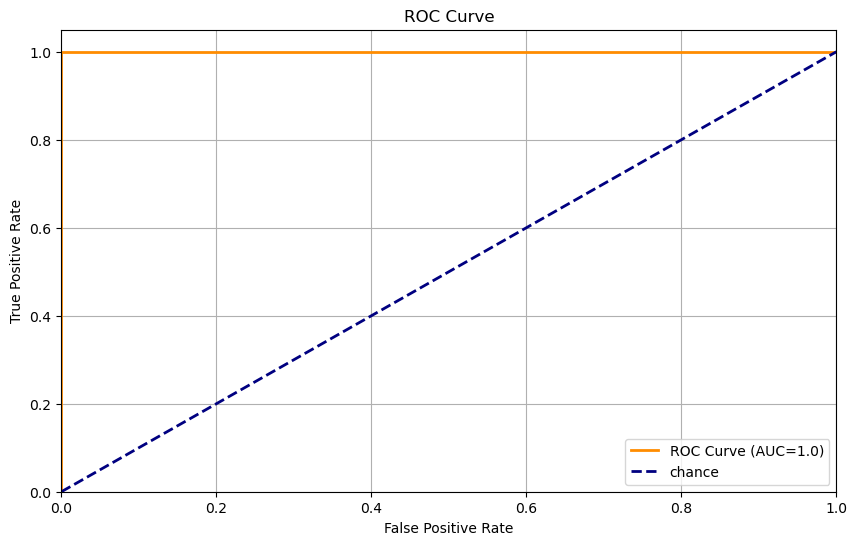

In [23]:
import matplotlib.pyplot as plt

models={
    "Random Forest":RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]

    # model training
    model.fit(X_train, y_train) 

    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance-evaluation
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_rocauc=roc_auc_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred, average='weighted')

    # test set performance evaluation
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_recall=recall_score(y_test, y_test_pred)
    model_test_rocauc=roc_auc_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training Set:")
    print('- Accuracy Score : ',model_train_accuracy)
    print('- Precision Score : ',model_train_precision)
    print('- Recall Score : ', model_train_recall)
    print('- ROC AUC Score : ',model_train_rocauc)
    print('- F1 Score : ',model_train_f1)

    print('------------------------------------------------------------------------------')

    print("Model Performance for Testing Set:")
    print('- Accuracy Score : ',model_test_accuracy)
    print('- Precision Score : ',model_test_precision)
    print('- Recall Score : ', model_test_recall)
    print('- ROC AUC Score : ',model_test_rocauc)
    print('- F1 Score : ',model_test_f1)

    # ROC Curve 

    y_scores=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds=roc_curve(y_score=y_scores, y_true=y_test)
    roc_auc_rf=roc_auc_score(y_score=y_scores, y_true=y_test)

    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC={roc_auc_rf})')
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--', label='chance')

    plt.title(f'ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [24]:
test_data=pd.read_csv('test.csv')

In [25]:
test_data.isnull().sum()

Unnamed: 0               0
warren_sanctity_index    0
valak_presence_level     0
dtype: int64

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             72 non-null     int64  
 1   warren_sanctity_index  72 non-null     float64
 2   valak_presence_level   72 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [27]:
model

RandomForestClassifier(max_features=8, n_estimators=200)

In [28]:
test_data.head()


,Unnamed: 0,warren_sanctity_index,valak_presence_level
0,0,1.869665,1.246625
1,1,-33.695463,-8.878922
2,2,-13.834169,-4.969592
3,3,-46.137362,-7.471159
4,4,7.819434,0.747186


In [29]:
test_data = test_data.drop(columns=['Unnamed: 0'], axis = 1)

In [30]:
test_data.head()

,warren_sanctity_index,valak_presence_level
0,1.869665,1.246625
1,-33.695463,-8.878922
2,-13.834169,-4.969592
3,-46.137362,-7.471159
4,7.819434,0.747186


In [31]:
new_column_order = [
    'valak_presence_level',  # New Column 1
    'warren_sanctity_index'  # New Column 2
]

# Reindex the DataFrame using the new order
df_swapped = test_data[new_column_order]

In [32]:
y_pred = model.predict(df_swapped)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- valak_presence_level
- warren_sanctity_index
Feature names seen at fit time, yet now missing:
- possession_state


In [ ]:
X